In [30]:
import os
import ipywidgets
import adaptive_mis as mis
import adaptive_mis.common.jupyter_utils as ju
from adaptive_mis.common import load_config
from adaptive_mis.common import printc
if 'datasets' not in os.listdir('.'):
    os.chdir('../')

all_datasets=sorted(os.listdir(f'configs/datasets'))
all_datasets.insert(0,'select dataset')
dataset_dd=ipywidgets.Dropdown(options=all_datasets,description="dataset")
display(dataset_dd)
ju.wait_for_user(dataset_dd)
dataset_file=dataset_dd.value

Dropdown(description='dataset', options=('select dataset', 'isic.yaml', 'segpc.yaml'), value='select dataset')

.....................continuing...


In [124]:
mis.reload()
db_config=load_config(f'dataset: !include configs/datasets/{dataset_file}')  
print(db_config)
dataset=mis.loader(db_config,'dataset')
dataset.summary()

{'dataset': {'title': 'SegPC2021', 'class': 'adaptive_mis.dataset.SegPC2021Dataset', 'params': {'datadir': 'datasets/SegPC2021', 'image_size': 224, 'crop_nucleus': True, 'crop_scale': 2.5}}}
Number of images: 33 channels=4 classes=2(['background', 'cytoplasm']) image_size=224


Number of images: 33 channels=4 classes=2(['background', 'cytoplasm']) image_size=224


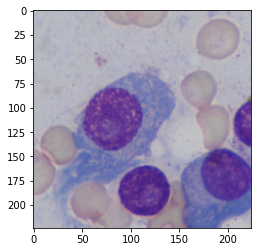

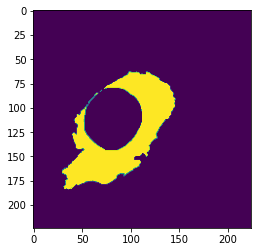

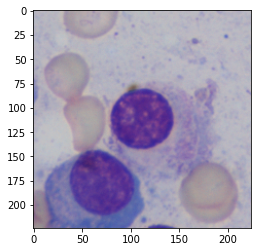

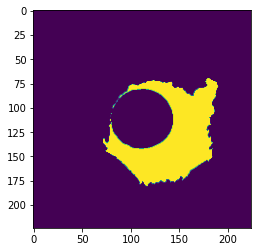

In [118]:
from matplotlib import pyplot as plt

for i in range(12,14):
    ds=dataset[i]
    # print(ds)
    plt.imshow(ds['image'].numpy().transpose(1, 2, 0)[:,:,:3])
    plt.show()
    plt.imshow(ds['mask'].numpy().transpose(1, 2, 0))
    plt.show()

In [114]:
x=ds['image']
x.shape
x.numpy().transpose(1,2,0)

array([[[0.7018459 , 0.71753216, 0.7588312 , 0.        ],
        [0.70622706, 0.72558975, 0.76431525, 0.        ],
        [0.72310436, 0.7126226 , 0.7564759 , 0.        ],
        ...,
        [0.7287416 , 0.7324563 , 0.76062346, 0.        ],
        [0.71188724, 0.7273285 , 0.76262254, 0.        ],
        [0.7110256 , 0.74239814, 0.7650659 , 0.        ]],

       [[0.72315025, 0.7331878 , 0.751348  , 0.        ],
        [0.7258387 , 0.72433364, 0.75243187, 0.        ],
        [0.72504973, 0.7279412 , 0.7601065 , 0.        ],
        ...,
        [0.71838236, 0.7279335 , 0.7584559 , 0.        ],
        [0.7255783 , 0.7271714 , 0.75759804, 0.        ],
        [0.71591985, 0.723943  , 0.7695198 , 0.        ]],

       [[0.7128677 , 0.7390932 , 0.76012564, 0.        ],
        [0.7284237 , 0.7231465 , 0.75506663, 0.        ],
        [0.7084559 , 0.73982847, 0.76382124, 0.        ],
        ...,
        [0.7184513 , 0.7332912 , 0.75479096, 0.        ],
        [0.7244524 , 0.725187

In [103]:
d=ds['image']
import numpy as np
print(d.shape)
from torchvision import transforms
x=transforms.ToTensor()(d.numpy())
print(x.shape)

torch.Size([224, 224, 4])
torch.Size([4, 224, 224])
